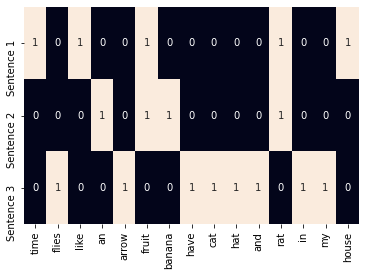

In [11]:
#Simple Bow

from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = [
           'Time flies flies like an arrow.',
           'Fruit flies like a banana.',
           'I have a cat hat and a rat in my house.'
]

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.vocabulary_
sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels=vocab,
            yticklabels=['Sentence 1','Sentence 2','Sentence 3'])

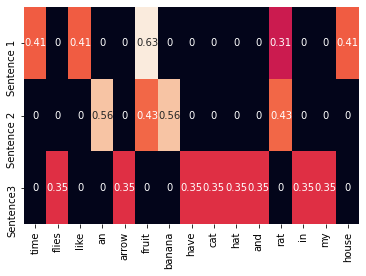

In [13]:
#TF-idf on same corpus

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels= ['Sentence 1', 'Sentence 2', 'Sentence3'])

--Slight pytorch--

In [15]:
def describe(x):
    print("Type: {}".format(x.type()))
    print("Shape/size: {}".format(x.shape))
    print("Values: \n{}".format(x))

import torch
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [16]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [17]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([])
Values: 
21.0
False


When you create a tensor with requires_grad=True, you are requiring PyTorch to manage bookkeeping information that computes gradients. First, PyTorch will keep track of the values of the forward pass. Then, at the end of the computations, a single scalar is used to compute a backward pass. The backward pass is initiated by using the backward() method on a tensor resulting from the evaluation of a loss function. The backward pass computes a gradient value for a tensor object that participated in the forward pass.

In general, the gradient is a value that represents the slope of a function output with respect to the function input. In the computational graph setting, gradients exist for each parameter in the model and can be thought of as the parameter’s contribution to the error signal. In PyTorch, you can access the gradients for the nodes in the computational graph by using the .grad member variable. Optimizers use the .grad variable to update the values of the parameters.

In [0]:
'''Create a 2D tensor and then add a dimension of size 1 inserted at dimension 0.

Remove the extra dimension you just added to the previous tensor.

Create a random tensor of shape 5x3 in the interval [3, 7)

Create a tensor with values from a normal distribution (mean=0, std=1).

Retrieve the indexes of all the nonzero elements in the tensor torch.Tensor([1, 1, 1, 0, 1]).

Create a random tensor of size (3,1) and then horizontally stack four copies together.

Return the batch matrix-matrix product of two three-dimensional matrices (a=torch.rand(3,4,5), b=torch.rand(3,5,4)).

Return the batch matrix-matrix product of a 3D matrix and a 2D matrix (a=torch.rand(3,4,5), b=torch.rand(5,4)).'''

a = torch.rand(3, 3)

a.unsqueeze(0)

a.squeeze(0)

3 + torch.rand(5, 3) * (7 - 3)

a = torch.rand(3, 3)

a.normal_()

a = torch.Tensor([1, 1, 1, 0, 1])

torch.nonzero(a)

a = torch.rand(3, 1)

a.expand(3, 4)

a = torch.rand(3, 4, 5)

b = torch.rand(3, 5, 4)

torch.bmm(a, b)

a = torch.rand(3, 4, 5)

b = torch.rand(5, 4)

torch.bmm(a, b.unsqueeze(0).expand(a.size(0), *b.size()))